In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
func = lambda point: 50* point[0] + 65*point[1]

resolution = 100
dimension = 2

In [12]:
A = np.linspace(0, 20, resolution)
B = np.linspace(0, 22.5, resolution)
Z = np.zeros((resolution, resolution))

In [13]:
for index_a, a in enumerate(A):
    for index_b, b in enumerate(B):
        Z[index_a, index_b] = func((a, b))


In [14]:
def constraints(point):
    a = point[0]
    b = point[1]
    
    if a < 0: return False
    if b < 0: return False
    if a > 20: return False
    if b > 22.5: return False
    if a + b > 27: return False
    if 20*a + 15*b > 450: return False
    
    return True

point is [0.45873548 3.76737724] eval=267.8162946175852
point=[0.50873548 3.83237724] eval=274.54129461758515
point=[1.00873548 4.48237724] eval=341.7912946175854
point=[1.50873548 5.13237724] eval=409.0412946175851
point=[2.00873548 5.78237724] eval=476.2912946175851
point=[2.50873548 6.43237724] eval=543.5412946175851
point=[3.00873548 7.08237724] eval=610.7912946175843
point=[3.50873548 7.73237724] eval=678.0412946175845
point=[4.00873548 8.38237724] eval=745.2912946175844
point=[4.50873548 9.03237724] eval=812.5412946175838
point=[5.00873548 9.68237724] eval=879.7912946175834
point=[ 5.50873548 10.33237724] eval=947.0412946175826
point=[ 6.00873548 10.98237724] eval=1014.291294617582
point=[ 6.50873548 11.63237724] eval=1081.5412946175816
point=[ 7.00873548 12.28237724] eval=1148.7912946175804
point=[ 7.50873548 12.93237724] eval=1216.0412946175793
point=[ 8.00873548 13.58237724] eval=1283.2912946175788
point=[ 8.50873548 14.23237724] eval=1350.5412946175786
point=[ 9.00873548 14.8

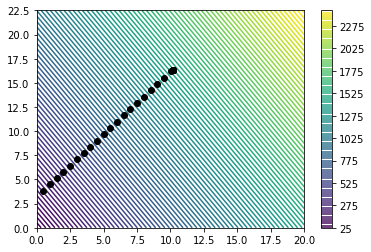

In [18]:
plt.contour(A, B, Z, 100)
plt.colorbar()

randomPoint = np.random.rand(dimension) * 22.5 
while constraints(randomPoint) == False:
    randomPoint = np.random.rand(dimension) * 22.5 
    
gradient = np.zeros(dimension)
increment = 0.1
lr = 0.001

print(f"point is {randomPoint} eval={func(randomPoint)}")
plt.plot(randomPoint[0], randomPoint[1], "o", c="white")

for i in range(500):
    
    for axis in range(dimension):
        newPoint = np.copy(randomPoint)
        newPoint[axis] = newPoint[axis] + increment
        partialDerivate = (func(newPoint) - func(randomPoint)) / increment
        gradient[axis] = partialDerivate if constraints(newPoint) else 0

    randomPoint = randomPoint + (lr * gradient)
    if i % 10 == 0: 
        plt.plot(randomPoint[0], randomPoint[1], "o", c="black")
        print(f"point={randomPoint} eval={func(randomPoint)}")
    
plt.show()